<a href="https://colab.research.google.com/github/29tushar/SC4001_NeuralNetworks/blob/main/Final_SC4001_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [1]:

import yfinance as yf
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from torch import optim, from_numpy

In [78]:
yf??

In [ ]:
dir(yf)

['EquityQuery',
 'Industry',
 'Screener',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screener',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

In [ ]:
yf.download?

In [5]:
import pandas as pd
import yfinance as yf


df = yf.download('AAPL',
                  start='2014-01-01',
                  end='2024-08-01',
                  interval='1d')


df.columns = [col[0] for col in df.columns]


df['Company'] = 'AAPL'


df = df[['Company', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

df.reset_index(inplace=True)


df.set_index('Date', inplace=True)

[*********************100%***********************]  1 of 1 completed


In [6]:

df.head()

,Company,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2014-01-02 00:00:00+00:00,AAPL,19.845715,19.893929,19.715000,19.754642,17.234303,234684800
2014-01-03 00:00:00+00:00,AAPL,19.745001,19.775000,19.301071,19.320715,16.855726,392467600
2014-01-06 00:00:00+00:00,AAPL,19.194643,19.528570,19.057142,19.426071,16.947645,412610800
2014-01-07 00:00:00+00:00,AAPL,19.440001,19.498571,19.211430,19.287144,16.826443,317209200
2014-01-08 00:00:00+00:00,AAPL,19.243214,19.484285,19.238930,19.409286,16.932999,258529600


In [7]:
# Save the first 5 rows of df as a CSV file
df.head().to_csv('/content/Top 5 rows.csv', index=False)

# Download the CSV file
from google.colab import files
files.download('/content/Top 5 rows.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
df.shape

(2662, 7)

In [9]:
df.isnull().sum()

,0
Company,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [10]:
def info(stock, df):
    print(f"{stock}'s Historical Data: \n\n {df} \n")
    print(f"{stock}'s Column Information: \n")
    print(df.info(), '\n')
    print(f"{stock}'s Statistic Summary: \n\n {df.describe().round(4)}")
    print('-' * 75)
    print()

info('Apple', df)

Apple's Historical Data: 

                           Company        Open        High         Low  \
Date                                                                    
2014-01-02 00:00:00+00:00    AAPL   19.845715   19.893929   19.715000   
2014-01-03 00:00:00+00:00    AAPL   19.745001   19.775000   19.301071   
2014-01-06 00:00:00+00:00    AAPL   19.194643   19.528570   19.057142   
2014-01-07 00:00:00+00:00    AAPL   19.440001   19.498571   19.211430   
2014-01-08 00:00:00+00:00    AAPL   19.243214   19.484285   19.238930   
...                           ...         ...         ...         ...   
2024-07-25 00:00:00+00:00    AAPL  218.929993  220.850006  214.619995   
2024-07-26 00:00:00+00:00    AAPL  218.699997  219.490005  216.009995   
2024-07-29 00:00:00+00:00    AAPL  216.960007  219.300003  215.750000   
2024-07-30 00:00:00+00:00    AAPL  219.190002  220.330002  216.119995   
2024-07-31 00:00:00+00:00    AAPL  221.440002  223.820007  220.630005   

                      

In [11]:
print(df.columns.tolist())

['Company', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


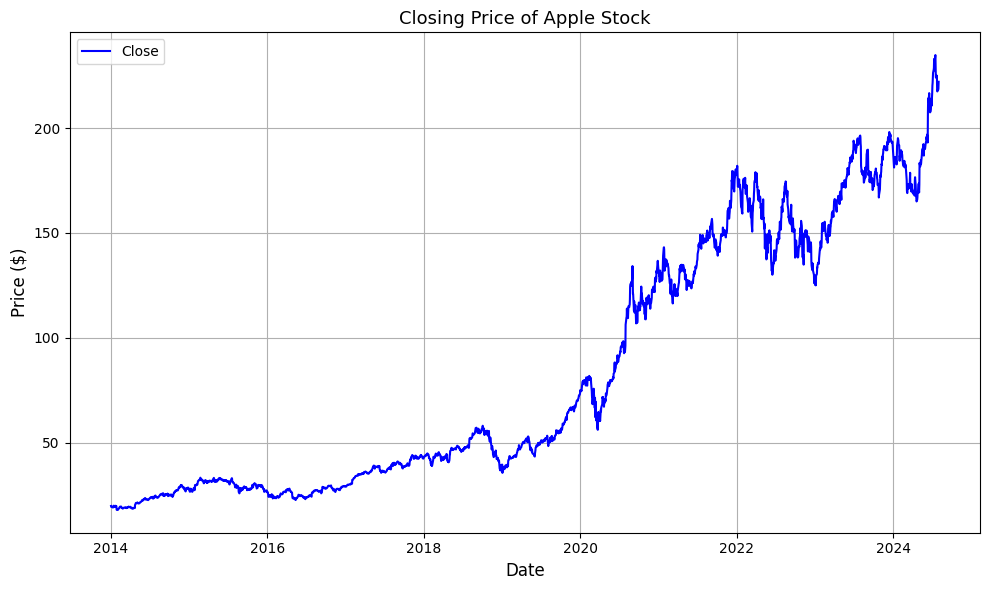

In [12]:
import matplotlib.pyplot as plt
import yfinance as yf

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close', color='blue')
plt.title('Closing Price of Apple Stock', fontsize=13)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig('/content/Closing_Price_Apple.png', format='png')


In [13]:
from google.colab import files
files.download('/content/Closing_Price_Apple.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

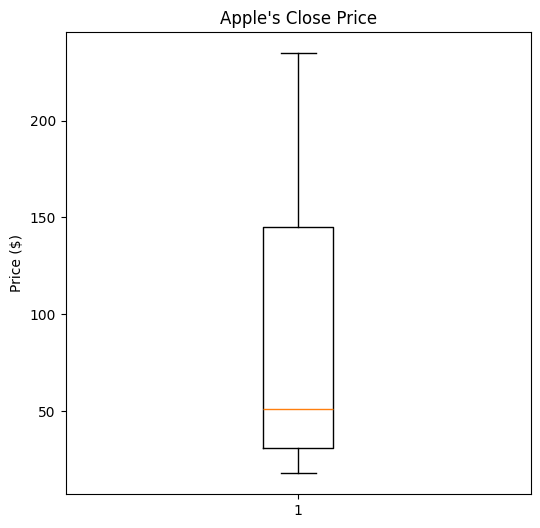

In [14]:
plt.figure(figsize=(6, 6))
plt.boxplot(df['Close'])
plt.ylabel('Price ($)')
plt.title("Apple's Close Price", fontsize=12)

# Save as PDF
plt.savefig('/content/Apple_Close_Boxplot.png', format='png')

# Download the file
from google.colab import files
files.download('/content/Apple_Close_Boxplot.png')  # or 'Apple_Close_Boxplot.png'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

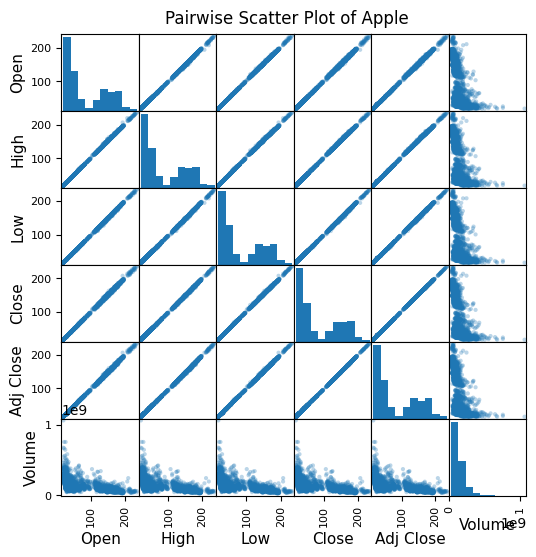

In [15]:
scatter_matrix = pd.plotting.scatter_matrix(df, figsize=(6, 6), alpha=0.3)

for ax in scatter_matrix.ravel():
    ax.xaxis.label.set_fontsize(11)
    ax.yaxis.label.set_fontsize(11)

plt.suptitle("Pairwise Scatter Plot of Apple", x=0.5, y=0.92, fontsize=12)


plt.savefig('/content/Apple_Scatter_Matrix.png', format='png')


files.download('/content/Apple_Scatter_Matrix.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

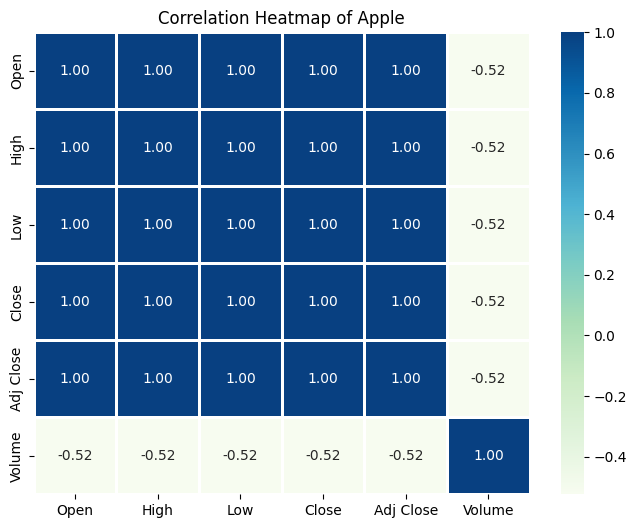

In [16]:
import seaborn as sns

numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), cmap='GnBu', annot=True, linewidths=1, fmt='.2f').set_title("Correlation Heatmap of Apple", fontsize=12)

plt.savefig('/content/Apple_Correlation_Heatmap.png', format='png')

files.download('/content/Apple_Correlation_Heatmap.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1000x600 with 0 Axes>

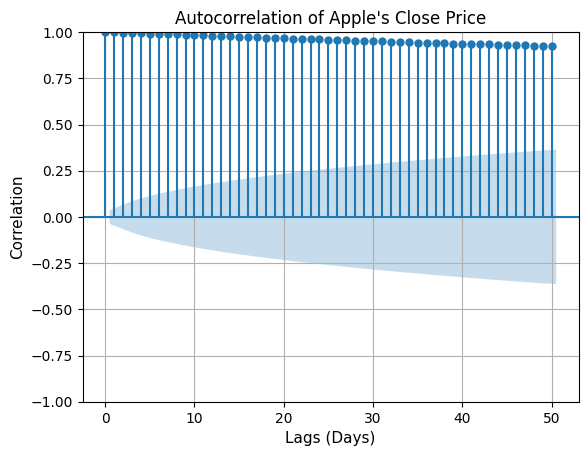

In [17]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(df["Close"], lags=50)
plt.title("Autocorrelation of Apple's Close Price", fontsize=12)
plt.xlabel("Lags (Days)", fontsize=11)
plt.ylabel("Correlation", fontsize=11)
plt.grid()

plt.savefig('/content/Apple_Autocorrelation.png', format='png')

files.download('/content/Apple_Autocorrelation.png')



In [18]:
df_ma = df.copy()

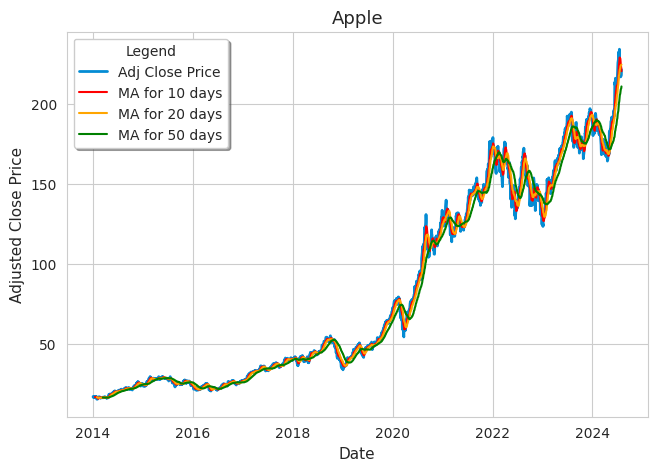

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


ma_days = [10, 20, 50]

for ma in ma_days:
    column_name = f'MA for {ma} days'
    df_ma[column_name] = df_ma['Adj Close'].rolling(window=ma).mean()

plt.figure(figsize=(7.5, 5))
plt.plot(df_ma['Adj Close'], label='Adj Close Price', color='#048cd4', linewidth=2)
plt.plot(df_ma['MA for 10 days'], label='MA for 10 days', color='red', linewidth=1.5)
plt.plot(df_ma['MA for 20 days'], label='MA for 20 days', color='orange', linewidth=1.5)
plt.plot(df_ma['MA for 50 days'], label='MA for 50 days', color='green', linewidth=1.5)

plt.title('Apple', fontsize=13)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Adjusted Close Price', fontsize=11)
plt.legend(loc='upper left', title="Legend", frameon=True, shadow=True, fontsize=10)

plt.savefig('/content/Apple_Moving_Average.png', format='png')

plt.show()

from google.colab import files
files.download('/content/Apple_Moving_Average.png')



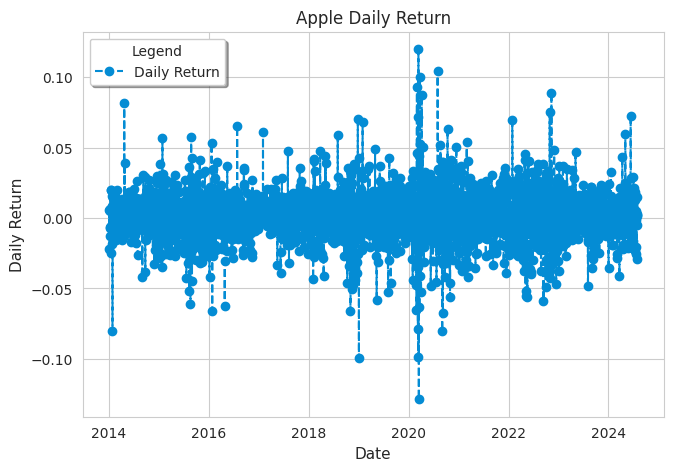

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

df_ma['Daily Return'] = df_ma['Adj Close'].pct_change()

plt.figure(figsize=(7.5, 5))
plt.plot(df_ma['Daily Return'], label='Daily Return', linestyle='--', marker='o', color='#048cd4')
plt.title('Apple Daily Return', fontsize=12)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Daily Return', fontsize=11)
plt.legend(loc='upper left', title="Legend", frameon=True, shadow=True, fontsize=10)
plt.savefig('/content/Apple_Daily_Return.png', format='png')

plt.show()
files.download('/content/Apple_Daily_Return.png')


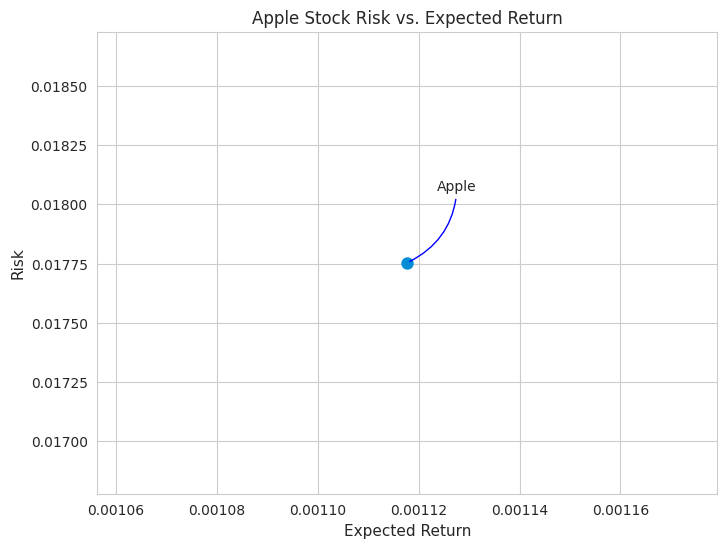

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import numpy as np


mean_return = df_ma['Daily Return'].mean()
std_return = df_ma['Daily Return'].std()

area = np.pi * 20
plt.figure(figsize=(8, 6))
plt.scatter(mean_return, std_return, s=area, color='#048cd4')
plt.xlabel('Expected Return', fontsize = 11)
plt.ylabel('Risk', fontsize = 11)
plt.title('Apple Stock Risk vs. Expected Return', fontsize = 12)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.annotate('Apple', xy=(mean_return, std_return),
             xytext=(50, 50), textcoords='offset points',
             ha='right', va='bottom',
             arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

plt.savefig('/content/Apple_Risk_vs_Return.png', format='png')
plt.show()
files.download('/content/Apple_Risk_vs_Return.png')



In [22]:
!pip install -q kaleido


In [23]:
import plotly.express as px
df.reset_index(inplace=True)


df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['Date'] = df['Date'].dt.date

fig = px.line(df, x='Date', y=['High', 'Low'],
              title="Analysis of High and Low Stock Prices for Apple (2014-2024)",
              labels={'value': 'Price ($)', 'variable': 'Price Type'},
              range_x=['2014-01-01', '2024-01-01'])

fig.write_image("/content/High_Low_Stock_Prices_Apple.png", format="png")

fig.show()

from google.colab import files
files.download("/content/High_Low_Stock_Prices_Apple.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
fig = px.area(df, x='Date', y=['Open', 'Close'],
              title="Open and Close Stock Prices for Apple (2014-2024)",
              labels={'value': 'Price ($)', 'variable': 'Price Type'},
              range_x=['2014-01-01', '2024-01-01'])
fig.write_image("/content/Open_Close_Stock_Prices_Apple.png", format="png")

fig.show()
files.download("/content/Open_Close_Stock_Prices_Apple.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
fig = px.line(df, x='Date', y='Volume',
              color_discrete_sequence=["green"],
              title="Stock Volume Over Time for Apple (2014-2024)",
              labels={'Volume': 'Volume', 'Date': 'Date'})
fig.write_image("/content/Stock_Volume_Apple.png", format="png")

fig.show()
files.download("/content/Stock_Volume_Apple.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
list_to_plot = ["Open", "High", "Low", "Close"]


fig = px.line(df, x="Date", y=list_to_plot, title="Stocks Distribution over Different Time Windows")

fig.update_xaxes(
    range=['2014-01-01', '2024-08-01'],
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1 month", step="month", stepmode="backward"),
            dict(count=6, label="6 months", step="month", stepmode="backward"),
            dict(count=1, label="1 year", step="year", stepmode="backward"),
            dict(count=2, label="2 years", step="year", stepmode="backward"),
            dict(count=5, label="5 years", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.write_image("/content/Stocks_Distribution_Apple.png", format="png")

fig.show()
files.download("/content/Stocks_Distribution_Apple.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
df

,Date,Company,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,AAPL,19.845715,19.893929,19.715000,19.754642,17.234303,234684800
1,2014-01-03,AAPL,19.745001,19.775000,19.301071,19.320715,16.855726,392467600
2,2014-01-06,AAPL,19.194643,19.528570,19.057142,19.426071,16.947645,412610800
3,2014-01-07,AAPL,19.440001,19.498571,19.211430,19.287144,16.826443,317209200
4,2014-01-08,AAPL,19.243214,19.484285,19.238930,19.409286,16.932999,258529600
...,...,...,...,...,...,...,...,...
2657,2024-07-25,AAPL,218.929993,220.850006,214.619995,217.490005,216.999817,51391200
2658,2024-07-26,AAPL,218.699997,219.490005,216.009995,217.960007,217.468750,41601300
2659,2024-07-29,AAPL,216.960007,219.300003,215.750000,218.240005,217.748123,36311800
2660,2024-07-30,AAPL,219.190002,220.330002,216.119995,218.800003,218.306854,41643800


In [28]:
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

In [29]:
df_st= df[['Close']]  # We only need the 'Close' column for the tests
df_st = df_st.copy()

In [30]:
df_st

,Close
0,19.754642
1,19.320715
2,19.426071
3,19.287144
4,19.409286
...,...
2657,217.490005
2658,217.960007
2659,218.240005
2660,218.800003


In [31]:
df_st.to_csv('output df_st.csv', index=False)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, acf
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings('ignore')

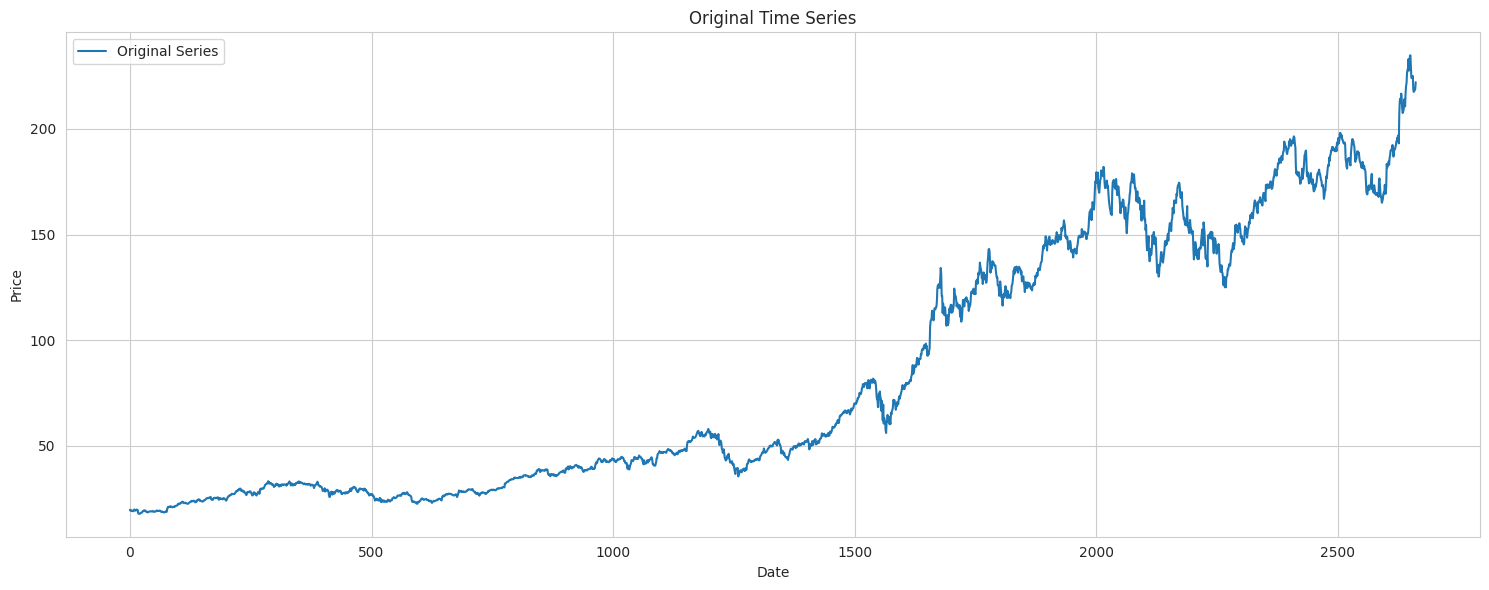


=== Testing Original Series ===

ADF Test Results:
ADF Statistic: 0.4362
p-value: 0.9828
Critical values:
	1%: -3.4328
	5%: -2.8626
	10%: -2.5674

KPSS Test Results:
KPSS Statistic: 7.9957
p-value: 0.0100
Critical values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

Ljung-Box Test Results:
Test Statistic: 100340.1704
p-value: 0.0000

Summary of Original Series:
ADF Test - Series is non-stationary
KPSS Test - Series is non-stationary
Ljung-Box Test - Residuals are dependent

=== Testing Differenced Series ===


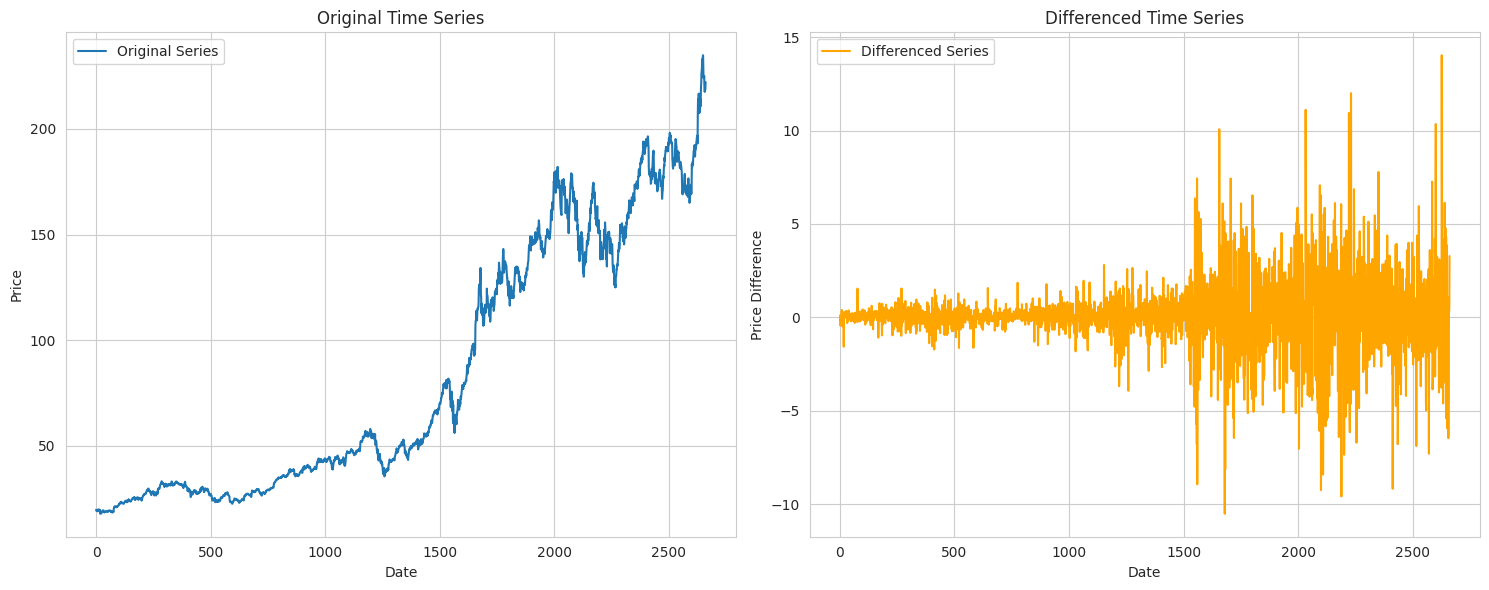


ADF Test Results:
ADF Statistic: -10.9112
p-value: 0.0000
Critical values:
	1%: -3.4328
	5%: -2.8626
	10%: -2.5674

KPSS Test Results:
KPSS Statistic: 0.2109
p-value: 0.1000
Critical values:
	10%: 0.3470
	5%: 0.4630
	2.5%: 0.5740
	1%: 0.7390

Ljung-Box Test Results:
Test Statistic: 84.1550
p-value: 0.0001

Summary of Differenced Series:
ADF Test - Series is stationary
KPSS Test - Series is stationary
Ljung-Box Test - Residuals are dependent


In [33]:
# 1. Augmented Dickey-Fuller (ADF) Test
def perform_adf_test(series):
    result = adfuller(series.values, regression='c')  # Using .values to convert to numpy array
    print("\nADF Test Results:")
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')
    return result[1] < 0.05  # Returns True if series is stationary

# 2. KPSS Test
def perform_kpss_test(series):
    result = kpss(series.values, regression='c', nlags="auto")  # Using .values to convert to numpy array
    print("\nKPSS Test Results:")
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical values:')
    for key, value in result[3].items():
        print(f'\t{key}: {value:.4f}')
    return result[1] > 0.05  # Returns True if series is stationary

# 3. Ljung-Box Test
def perform_ljung_box_test(series, lags=40):
    try:
        result = acorr_ljungbox(series.values, lags=[lags])  # Using .values to convert to numpy array
        print("\nLjung-Box Test Results:")
        print(f'Test Statistic: {result.lb_stat.iloc[0]:.4f}')
        print(f'p-value: {result.lb_pvalue.iloc[0]:.4f}')
        return result.lb_pvalue.iloc[0] > 0.05  # Returns True if residuals are independent
    except Exception as e:
        print("\nLjung-Box Test Results:")
        print(f"Error performing Ljung-Box test: {str(e)}")
        return False

# Function to plot time series
def plot_series(original_series, diff_series=None):
    plt.figure(figsize=(15, 6))

    if diff_series is not None:
        plt.subplot(1, 2, 1)

    plt.plot(original_series.index, original_series.values, label='Original Series')
    plt.title('Original Time Series')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    if diff_series is not None:
        plt.subplot(1, 2, 2)
        plt.plot(diff_series.index, diff_series.values, label='Differenced Series', color='orange')
        plt.title('Differenced Time Series')
        plt.xlabel('Date')
        plt.ylabel('Price Difference')
        plt.legend()

    plt.tight_layout()
    plt.show()

def run_stationarity_analysis(df_st):
    # Get the closing prices series
    closing_prices = df_st['Close']

    # Plot original series
    plot_series(closing_prices)

    # Perform tests on original series
    print("\n=== Testing Original Series ===")
    is_stationary_adf = perform_adf_test(closing_prices)
    is_stationary_kpss = perform_kpss_test(closing_prices)
    is_independent = perform_ljung_box_test(closing_prices)

    print("\nSummary of Original Series:")
    print(f"ADF Test - Series is {'stationary' if is_stationary_adf else 'non-stationary'}")
    print(f"KPSS Test - Series is {'stationary' if is_stationary_kpss else 'non-stationary'}")
    print(f"Ljung-Box Test - Residuals are {'independent' if is_independent else 'dependent'}")

    # If the series is non-stationary, difference it
    if not is_stationary_adf or not is_stationary_kpss:
        print("\n=== Testing Differenced Series ===")
        diff_series = closing_prices.diff().dropna()

        # Plot both original and differenced series
        plot_series(closing_prices, diff_series)

        # Perform tests on differenced series
        is_stationary_adf_diff = perform_adf_test(diff_series)
        is_stationary_kpss_diff = perform_kpss_test(diff_series)
        is_independent_diff = perform_ljung_box_test(diff_series)

        print("\nSummary of Differenced Series:")
        print(f"ADF Test - Series is {'stationary' if is_stationary_adf_diff else 'non-stationary'}")
        print(f"KPSS Test - Series is {'stationary' if is_stationary_kpss_diff else 'non-stationary'}")
        print(f"Ljung-Box Test - Residuals are {'independent' if is_independent_diff else 'dependent'}")

        return diff_series if (is_stationary_adf_diff and is_stationary_kpss_diff) else closing_prices

    return closing_prices

# Run the analysis with your existing dataframe
stationary_series = run_stationarity_analysis(df_st)

In [34]:

lstm_dataset = df_st.copy()
for i in range(1, 8):
    lstm_dataset['Close-'+str(i)] = df_st['Close'].shift(i)
lstm_dataset = lstm_dataset[7:]
lstm_dataset

,Close,Close-1,Close-2,Close-3,Close-4,Close-5,Close-6,Close-7
7,19.133215,19.033571,19.161428,19.409286,19.287144,19.426071,19.320715,19.754642
8,19.513929,19.133215,19.033571,19.161428,19.409286,19.287144,19.426071,19.320715
9,19.905714,19.513929,19.133215,19.033571,19.161428,19.409286,19.287144,19.426071
10,19.794643,19.905714,19.513929,19.133215,19.033571,19.161428,19.409286,19.287144
11,19.309643,19.794643,19.905714,19.513929,19.133215,19.033571,19.161428,19.409286
...,...,...,...,...,...,...,...,...
2657,217.490005,218.539993,225.009995,223.960007,224.309998,224.179993,228.880005,234.820007
2658,217.960007,217.490005,218.539993,225.009995,223.960007,224.309998,224.179993,228.880005
2659,218.240005,217.960007,217.490005,218.539993,225.009995,223.960007,224.309998,224.179993
2660,218.800003,218.240005,217.960007,217.490005,218.539993,225.009995,223.960007,224.309998


In [36]:
data = df.copy()

In [37]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-06,19.426071
3,2014-01-07,19.287144
4,2014-01-08,19.409286
...,...,...
2657,2024-07-25,217.490005
2658,2024-07-26,217.960007
2659,2024-07-29,218.240005
2660,2024-07-30,218.800003


In [40]:
from copy import deepcopy as dc
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Prepare dataframe for LSTM with correct scaling
def prepare_dataframe_for_lstm(df, n_steps):
    df_lstm = dc(df)
    df_lstm.set_index('Date', inplace=True)

    # Scale only 'Close' prices
    close_prices = df_lstm['Close'].values.reshape(-1, 1)
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_close = scaler.fit_transform(close_prices)
    df_lstm['Close'] = scaled_close  # Replace original close prices with scaled values

    for i in range(1, n_steps + 1):
        df_lstm[f'Close(t-{i})'] = df_lstm['Close'].shift(i)

    df_lstm.dropna(inplace=True)
    return df_lstm, scaler  # Return scaler for inverse transformation later

lookback = 7
shifted_df, scaler = prepare_dataframe_for_lstm(data, lookback)
shifted_df_as_np = shifted_df.to_numpy()


In [45]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import explained_variance_score, r2_score

In [46]:
# Split into X and y
X = shifted_df_as_np[:, 1:]  # Using all but the first column as features (Close(t-1), Close(t-2), ...)
y = shifted_df_as_np[:, 0]   # Using the first column (Close) as target

# Reshape for LSTM input
X = X.reshape(-1, lookback, 1)  # (num_samples, time_steps, features)
y = y.reshape(-1, 1)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

train_split_index = int(0.85 * len(X_tensor))
val_split_index = int(0.95 * len(X_tensor))

X_train, X_val, X_test = (
    X_tensor[:train_split_index],
    X_tensor[train_split_index:val_split_index],
    X_tensor[val_split_index:],
)
y_train, y_val, y_test = (
    y_tensor[:train_split_index],
    y_tensor[train_split_index:val_split_index],
    y_tensor[val_split_index:],
)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)


In [47]:
def inverse_transform_predictions(scaled_predictions, scaler):
    # Reshape predictions if needed
    if len(scaled_predictions.shape) == 1:
        scaled_predictions = scaled_predictions.reshape(-1, 1)
    return scaler.inverse_transform(scaled_predictions)


In [57]:
# Define LSTM model for predicting stock prices
class LSTMStockPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout=0.1):
        super(LSTMStockPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)  # output size of 1 (predicting next day's close price)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Only take the output from the last timestep
        return out

def evaluate(model, data_loader, loss_fn, scaler, metrics=None):
        model.eval()
        running_loss = 0.0
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for inputs, targets in data_loader:
                predictions = model(inputs)
                loss = loss_fn(predictions, targets)
                running_loss += loss.item() * inputs.size(0)

                all_preds.append(predictions.cpu().numpy())
                all_targets.append(targets.cpu().numpy())

        all_preds = np.concatenate(all_preds, axis=0)
        all_targets = np.concatenate(all_targets, axis=0)

        # Inverse transform predictions and targets
        original_preds = inverse_transform_predictions(all_preds, scaler)
        original_targets = inverse_transform_predictions(all_targets, scaler)

        result = {
            "loss": round(running_loss / len(data_loader.dataset), 4),  # loss is already included here
        }

        if metrics:
            if "rmse" in metrics:
                rmse = np.sqrt(np.mean((original_preds - original_targets) ** 2))
                result["RMSE"] = round(rmse, 4)
            if "mae" in metrics:
                mae = np.mean(np.abs(original_preds - original_targets))
                result["MAE"] = round(mae, 4)
            if "explained_variance" in metrics:
                ev = explained_variance_score(original_targets, original_preds)
                result["Explained Variance"] = round(ev, 4)
            if "r2" in metrics:
                r2 = r2_score(original_targets, original_preds)
                result["R-Squared"] = round(r2, 4)

        return result

def train_epoch(model, data_loader, loss_fn, optimizer):
    model.train()
    running_loss = 0.0
    for inputs, targets in data_loader:
        optimizer.zero_grad()
        predictions = model(inputs)
        loss = loss_fn(predictions, targets)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)  # Gradient clipping
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    # Return the average loss for the epoch
    return running_loss / len(data_loader.dataset)

# Hyperparameters and Grid Search Setup
lr = 0.001
batch_sizes = [16, 32, 64]
depths = [2, 3, 4]  # Number of LSTM layers
widths = [32, 64, 128, 256]  # Hidden layer sizes
num_epochs = 100

best_model = None
best_val_loss = np.inf
best_val_rmse = np.inf
best_val_r2 = -np.inf
best_config = {}

# Training Loop with Hyperparameter Search
for batch_size in batch_sizes:
    print(f"\n{'-' * 50}")  # Print separator
    print(f"Training with Batch Size: {batch_size}")
    print(f"{'-' * 50}\n")

    # Prepare data for this batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    for num_layers in depths:
        for hidden_size in widths:
            print(f"\nTraining model with depth={num_layers} and width={hidden_size}")
            print(f"{'-' * 50}\n")

            model = LSTMStockPredictor(input_size=1, hidden_size=hidden_size, num_layers=num_layers, dropout=0.1 if num_layers > 1 else 0)
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
            loss_fn = nn.MSELoss()

            # Early stopping variables
            patience = 5
            no_improv_epochs = 0
            best_val_loss = np.inf
            early_stop = False

            for epoch in range(num_epochs):
                train_loss = train_epoch(model, train_loader, loss_fn, optimizer)
                val_metrics = evaluate(model, val_loader, loss_fn, metrics=["rmse", "mae", "explained_variance", "r2"], scaler=scaler)


                print(f"Epoch {epoch+1} - Train loss: {train_loss:.4f}, Validation loss: {val_metrics['loss']:.4f}, "
                    f"Validation metrics: RMSE: {val_metrics.get('RMSE', 'N/A'):.4f}, MAE: {val_metrics.get('MAE', 'N/A'):.4f}, "
                    f"Explained Variance: {val_metrics.get('Explained Variance', 'N/A'):.4f}, "
                    f"R-Squared: {val_metrics.get('R-Squared', 'N/A'):.4f}")

                # Update the best model based on validation loss and RMSE / R-Squared
                if val_metrics["loss"] < best_val_loss:
                    best_val_loss = val_metrics["loss"]
                    best_val_rmse = val_metrics.get("RMSE", np.inf)
                    best_val_r2 = val_metrics.get("R-Squared", -np.inf)
                    best_model = model
                    best_config = {"depth": num_layers, "width": hidden_size, "batch_size": batch_size}
                    no_improv_epochs = 0
                elif val_metrics["loss"] == best_val_loss:
                    # If loss is the same, prefer the model with the lower RMSE and higher R-Squared
                    if val_metrics.get("RMSE", np.inf) < best_val_rmse:
                        best_val_rmse = val_metrics["RMSE"]
                        best_model = model
                        best_config = {"depth": num_layers, "width": hidden_size, "batch_size": batch_size}
                    elif val_metrics.get("R-Squared", -np.inf) > best_val_r2:
                        best_val_r2 = val_metrics["R-Squared"]
                        best_model = model
                        best_config = {"depth": num_layers, "width": hidden_size, "batch_size": batch_size}

                    no_improv_epochs = 0
                else:
                    no_improv_epochs += 1
                    if no_improv_epochs >= patience:
                        print("Early stopping triggered.")
                        early_stop = True
                        break


            test_metrics = evaluate(model, test_loader, loss_fn, metrics=["rmse", "mae", "explained_variance", "r2"], scaler=scaler)
            print(f"Test loss: {test_metrics['loss']:.4f}, Test metrics: RMSE: {test_metrics.get('RMSE', 'N/A')}, MAE: {test_metrics.get('MAE', 'N/A')}, Explained Variance: {test_metrics.get('Explained Variance', 'N/A')}, R-Squared: {test_metrics.get('R-Squared', 'N/A')}")

# Final evaluation
test_metrics = evaluate(best_model, test_loader, loss_fn, metrics=["rmse", "mae", "explained_variance", "r2"], scaler=scaler)
print(f"\nBest Model - Depth: {best_config['depth']}, Width: {best_config['width']}, Batch Size: {best_config['batch_size']}")
print(f"Validation Loss: {best_val_loss:.4f}, Test metrics: RMSE: {test_metrics.get('RMSE', 'N/A')}, MAE: {test_metrics.get('MAE', 'N/A')}, Explained Variance: {test_metrics.get('Explained Variance', 'N/A')}, R-Squared: {test_metrics.get('R-Squared', 'N/A')}")

print(f"Test Loss: {test_metrics['loss']:.4f}")
print(f"Test metrics: {test_metrics}")

# Best hyperparameters output
print("\nBest Model Hyperparameters:")
print(f"Batch Size: {best_config['batch_size']}")
print(f"Hidden Size: {best_config['width']}")
print(f"Num Layers: {best_config['depth']}")
print(f"Dropout: 0.2" if best_config['depth'] > 1 else "Dropout: 0")
print(f"Learning Rate: {lr}")
print(f"Best Validation Loss: {best_val_loss:.4f}")


--------------------------------------------------
Training with Batch Size: 16
--------------------------------------------------


Training model with depth=2 and width=32
--------------------------------------------------

Epoch 1 - Train loss: 0.0931, Validation loss: 0.0218, Validation metrics: RMSE: 16.0187, MAE: 13.8968, Explained Variance: 0.7406, R-Squared: 0.1756
Epoch 2 - Train loss: 0.0017, Validation loss: 0.0068, Validation metrics: RMSE: 8.9599, MAE: 7.3861, Explained Variance: 0.8773, R-Squared: 0.7421
Epoch 3 - Train loss: 0.0014, Validation loss: 0.0046, Validation metrics: RMSE: 7.3528, MAE: 5.9814, Explained Variance: 0.9075, R-Squared: 0.8263
Epoch 4 - Train loss: 0.0013, Validation loss: 0.0032, Validation metrics: RMSE: 6.1095, MAE: 4.9908, Explained Variance: 0.9297, R-Squared: 0.8801
Epoch 5 - Train loss: 0.0012, Validation loss: 0.0081, Validation metrics: RMSE: 9.7594, MAE: 8.6151, Explained Variance: 0.9226, R-Squared: 0.6940
Epoch 6 - Train loss: 0.0012, V

In [107]:
def predict_next_n_days(model, input_data, n_steps):
    model.eval()
    predictions = []
    current_data = input_data.clone()  # Clone to avoid modifying the original data

    with torch.no_grad():
        for _ in range(n_steps):
            pred = model(current_data).cpu().numpy().flatten()
            predictions.append(pred)
            # Append the prediction and roll the input for the next step
            current_data = torch.cat([current_data[:, 1:, :], torch.tensor(pred).unsqueeze(0).unsqueeze(0)], dim=1)

    return np.array(predictions).flatten()


In [108]:
def avg_error_percentage(y_actual, y_predicted):
    # Calculate the absolute error between actual and predicted values
    absolute_errors = np.abs(y_actual - y_predicted)
    # Calculate the error percentage for each data point
    error_percentages = (absolute_errors / y_actual) * 100
    # Return the average error percentage
    return round(np.mean(error_percentages), 2)


In [109]:
def time_series_analysis(x_datas, y_datas, dates, model, scaler, forecast_steps=1):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    subplot_labels = ['Training Close Prices', 'Validation Close Prices', 'Test Close Prices']

    for i in range(3):
        with torch.no_grad():
            x_data, y_data = x_datas[i], y_datas[i]
            if forecast_steps == 1:
                y_pred = model(x_data).detach().cpu().numpy().flatten()
            else:
                y_pred = [predict_next_n_days(model, x.unsqueeze(0), forecast_steps) for x in x_data]
                y_pred = np.array(y_pred).reshape(-1)[:len(y_data)]

        # Convert predictions back to original scale
        y_table = pd.DataFrame()
        y_table['Date'] = dates[i]
        y_table['Actual Close'] = scaler.inverse_transform(y_data.reshape(-1, 1))
        y_table['Predicted Close'] = scaler.inverse_transform(y_pred.reshape(-1, 1))

        # Plot the data
        axes[i].plot(y_table['Date'], y_table['Actual Close'], color='teal', linewidth=1)
        axes[i].plot(y_table['Date'], y_table['Predicted Close'], color='pink', linewidth=1)

        # Scatter plot for test data
        if i == 2:
            axes[i].scatter(y_table['Date'], y_table['Actual Close'], color='teal', s=10, marker='o', label='Actual Close (Scatter)')
            axes[i].scatter(y_table['Date'], y_table['Predicted Close'], color='pink', s=10, marker='o', label='Predicted Close (Scatter)')

        error_percentage = avg_error_percentage(y_table['Actual Close'], y_table['Predicted Close'])
        axes[i].set_title(subplot_labels[i] + f" with average error {error_percentage}%")
        axes[i].tick_params(axis='x', rotation=90)
        axes[i].legend(['Actual Close', 'Predicted Close'])

    plt.tight_layout()
    plt.show()


In [110]:
dates = data['Date'][lookback:]

# Use the same indices as in the data splits
train_split_index = int(0.85 * len(dates))
val_split_index = int(0.95 * len(dates))

# Split dates into train, validation, and test sets
dates_train, dates_val, dates_test = (
    dates[:train_split_index],
    dates[train_split_index:val_split_index],
    dates[val_split_index:]
)

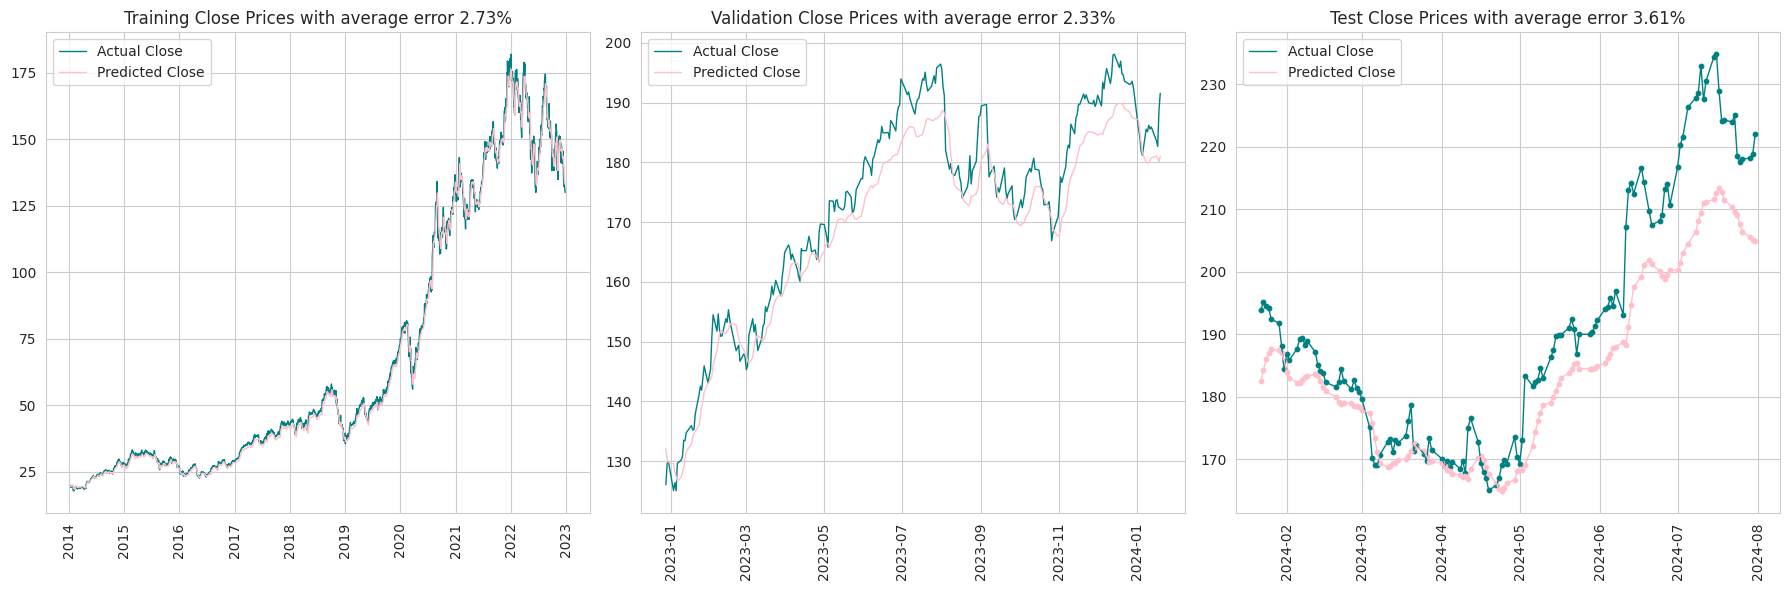

In [111]:
time_series_analysis(
    x_datas=[X_train, X_val, X_test],  # Use the split tensors directly
    y_datas=[y_train, y_val, y_test],  # Use the split targets
    dates=[dates_train, dates_val, dates_test],  # Dates for the corresponding splits
    model=best_model,  # Your trained LSTM model
    scaler=scaler,  # Scaler for inverse transforming predictions
    forecast_steps=1  # Forecasting the next day
)


In [112]:
def predict_future(y_data, dates, model, scaler, num_future_days):

    model.eval()
    future_preds = []

    # Get the last 7 days of close prices
    last_seven_closes = y_data[-7:].unsqueeze(0)  # Shape: (1, 7, 1)

    with torch.no_grad():
        for _ in range(num_future_days):
            # Predict the next day's close price
            tomorrow_pred = model(last_seven_closes).detach().cpu().numpy().flatten()

            # Inverse transform the prediction to original scale
            tomorrow_pred_scalar = scaler.inverse_transform(tomorrow_pred.reshape(-1, 1))[0][0]

            # Append prediction to results
            future_preds.append(tomorrow_pred_scalar)

            # Update the input sequence for the next prediction
            tomorrow_pred_tensor = torch.tensor(tomorrow_pred).unsqueeze(0).unsqueeze(2)
            last_seven_closes = torch.cat((last_seven_closes, tomorrow_pred_tensor), dim=1)
            last_seven_closes = last_seven_closes[:, 1:, :]  # Keep only the last 7 days

    # Generate future dates, excluding weekends
    future_dates = pd.date_range(
        start=(max(dates) + pd.Timedelta(days=1)),
        periods=num_future_days,
        freq='B'  # Exclude weekends
    )


    # Create a DataFrame for the results
    future_preds_table = pd.DataFrame({
        'Date': future_dates,
        'Predicted Close': future_preds
    })

    # Add a column for the day of the week
    future_preds_table['Day'] = future_preds_table['Date'].dt.day_name()

    return future_preds_table


        Date  Predicted Close        Day
0 2024-08-01       206.007584   Thursday
1 2024-08-02       204.634888     Friday
2 2024-08-05       204.335754     Monday
3 2024-08-06       203.961060    Tuesday
4 2024-08-07       203.076691  Wednesday
5 2024-08-08       201.602814   Thursday
6 2024-08-09       199.353760     Friday
7 2024-08-12       195.519821     Monday
8 2024-08-13       194.855759    Tuesday
9 2024-08-14       194.222000  Wednesday


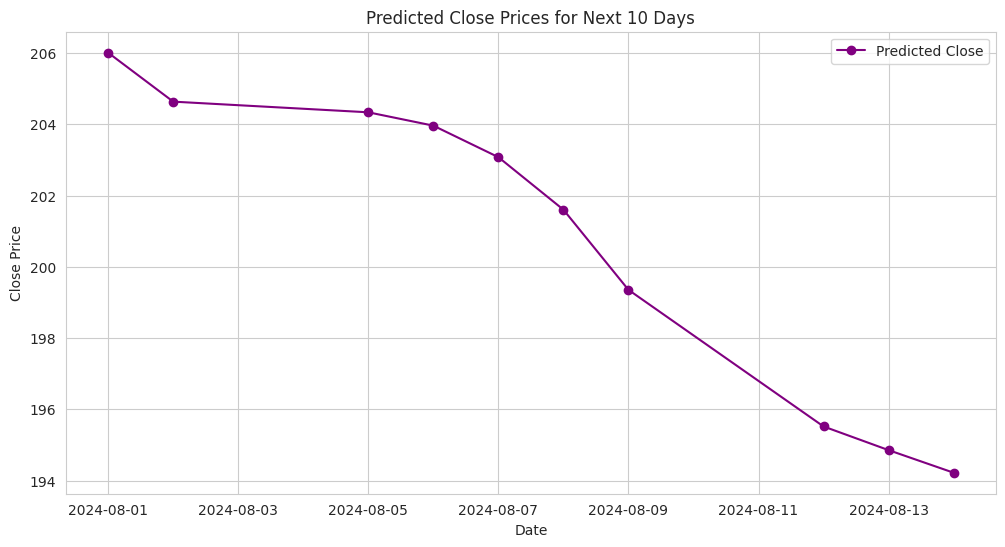

In [113]:
# Predict the next 10 business days
num_future_days = 10
future_predictions = predict_future(
    y_data=y_test,  # Use the test dataset's y-values
    dates=dates_test,  # Dates corresponding to test data
    model=best_model,  # Your trained LSTM model
    scaler=scaler,  # Scaler for inverse transforming predictions
    num_future_days=num_future_days
)

# Display the future predictions in a detailed DataFrame
print(future_predictions)

# Example plotting
plt.figure(figsize=(12, 6))
plt.plot(future_predictions['Date'], future_predictions['Predicted Close'], marker='o', color='purple', label='Predicted Close')

plt.title(f"Predicted Close Prices for Next {num_future_days} Days")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.show()
